In [4]:
import numpy as np
from matplotlib import pyplot as plt

Funkcje do interpolacji

In [5]:
def sin(x):
    return np.sin(x)

def inverted_sin(x):
    return np.sin(1/x)

def sign(x):
    return np.sign(np.sin(8 * x))

Funkcje interpolujace

In [6]:
def h1(t, x, space):
    if x <= t < x + space:
        return 1
    else:
        return 0

def h2(t, x, space):
    if x - 0.5*space <= t < x + 0.5*space:
        return 1
    else:
        return 0

def h3(t, x, space):
    if x - space <= t <= x + space:
        return 1 - abs(x - t)
    else:
        return 0   

Funkcja kernel

In [7]:

def kernel(sample_x, N_SAMPLES, x, y, h_fun, SPACE):
    sample_y = []
    i = 0

    for j in range(N_SAMPLES):
        s_y = h_fun(sample_x[j], x[i], SPACE) #sprawdzam czy dana probka miesci sie w przedziale obok danego pomiaru

        if(s_y == 0): #jesli sie nie, to miesi sie w przedziale nastepnego pomiaru
            i+=1
            s_y = h_fun(sample_x[j], x[i], SPACE) # TA INSTRUKCJA JEST NIEZBEDNA PRZY UZYCIU INSTRUKCJI H3
      
        sample_y.append(s_y * y[i])

    return sample_y


Funkcja MSE

In [8]:
def mse(x, y, N, interpol_func):
    sum = 0
    for j in range(N):       
        sum += (y[j] - interpol_func(x[j])) ** 2

    return sum / N

Interpolacja wykresu

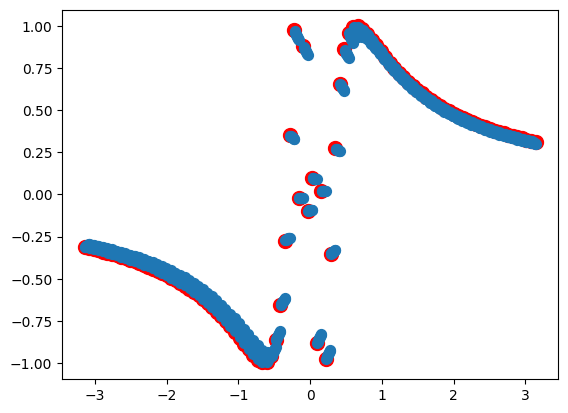

  Liczba pomiarow:  100  Liczba probek: 1000  MSE:  0.05934234747825912


In [9]:
N_MEASUREMENTS = 100 # mozna zmieniac
x = np.linspace(-np.pi, np.pi, N_MEASUREMENTS)
y = inverted_sin(x) # mozna zmieniac
SPACE = x[1] - x[0]

plt.scatter(x, y, c='red', s=100)

N_SAMPLES = 1000 # mozna zmieniac
sample_x = np.linspace(-np.pi, np.pi, N_SAMPLES)
sample_y = kernel(sample_x, N_SAMPLES, x, y, h3, SPACE) # funkcje przedostatni parametr funkcji kernel mozna zmieniac

plt.scatter(sample_x, sample_y, s=50)
plt.show()


print('  Liczba pomiarow: ', N_MEASUREMENTS, ' Liczba probek:', N_SAMPLES, ' MSE: ', mse(sample_x, sample_y, N_SAMPLES, inverted_sin)) # funkcje ostatni parametr mse mozna zmieniac
